In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
source = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-20/drought.csv')
source.head(5)

,map_date,state_abb,valid_start,valid_end,stat_fmt,drought_lvl,area_pct,area_total,pop_pct,pop_total
0,20210713,AK,2021-07-13,2021-07-19,2,None,74.35,433133.18,33.91,240644.16
1,20210713,AK,2021-07-13,2021-07-19,2,D0,25.65,149435.11,66.09,468985.84
2,20210713,AK,2021-07-13,2021-07-19,2,D1,0.00,0.00,0.00,0.00
3,20210713,AK,2021-07-13,2021-07-19,2,D2,0.00,0.00,0.00,0.00
4,20210713,AK,2021-07-13,2021-07-19,2,D3,0.00,0.00,0.00,0.00


In [62]:
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325728 entries, 0 to 325727
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   map_date     325728 non-null  int64  
 1   state_abb    325728 non-null  object 
 2   valid_start  325728 non-null  object 
 3   valid_end    325728 non-null  object 
 4   stat_fmt     325728 non-null  int64  
 5   drought_lvl  325728 non-null  object 
 6   area_pct     325728 non-null  float64
 7   area_total   325728 non-null  float64
 8   pop_pct      325728 non-null  float64
 9   pop_total    325728 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 24.9+ MB


In [63]:
source.describe(include = 'all')

,map_date,state_abb,valid_start,valid_end,stat_fmt,drought_lvl,area_pct,area_total,pop_pct,pop_total
count,3.257280e+05,325728,325728,325728,325728.0,325728,325728.000000,325728.000000,325728.000000,3.257280e+05
unique,NaN,52,1044,1044,NaN,6,NaN,NaN,NaN,NaN
top,NaN,ID,2011-02-01,2012-02-20,NaN,D2,NaN,NaN,NaN,NaN
freq,NaN,6264,312,312,NaN,54288,NaN,NaN,NaN,NaN
mean,2.011103e+07,NaN,NaN,NaN,2.0,NaN,16.666667,11537.667748,16.685712,9.982699e+05
std,5.787383e+04,NaN,NaN,NaN,0.0,NaN,29.086482,34384.031643,30.437573,2.780276e+06
min,2.001072e+07,NaN,NaN,NaN,2.0,NaN,0.000000,0.000000,0.000000,0.000000e+00
25%,2.006072e+07,NaN,NaN,NaN,2.0,NaN,0.000000,0.000000,0.000000,0.000000e+00
50%,2.011072e+07,NaN,NaN,NaN,2.0,NaN,0.000000,0.000000,0.000000,0.000000e+00
75%,2.016071e+07,NaN,NaN,NaN,2.0,NaN,20.980000,10290.042500,17.230000,5.612789e+05


# Preparation

In [12]:
#date varaibles apply to_date_time
source['valid_start'] = pd.to_datetime(source['valid_start'])
source['valid_end'] = pd.to_datetime(source['valid_end'])

In [13]:
print('start date range:', source['valid_start'].min(), 'to', source['valid_start'].max())
print('end date range:', source['valid_end'].min(), 'to', source['valid_end'].max())

start date range: 2001-07-17 00:00:00 to 2021-07-13 00:00:00
end date range: 2001-07-23 00:00:00 to 2021-07-19 00:00:00


In [14]:
source['valid_start'].dt.month.unique()

array([ 7,  6,  5,  4,  3,  2,  1, 12, 11, 10,  9,  8])

In [15]:
#categorical features
print('all states:', source['state_abb'].unique())
print('all levels:', source['drought_lvl'].unique())
print('all formats:', source['stat_fmt'].unique())

all states: ['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'PR' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']
all levels: ['None' 'D0' 'D1' 'D2' 'D3' 'D4']
all formats: [2]


map_date: date when map was published  #drop
    
state_abb: state abbreviation, 52 unique states
    
valid_start/end: start/end of weekly data, 20 yrs from 2001/7 to 2021/7, each yr has 

stat_fmt: stat format, all 2 #drop

drought_lvl: drought level, 5 levels

area_pct: percentage of this state currently in this level

area_total: total area of this state currently in this level

pop_pct: percentage of the population in this state currently in this level

pop_total: total number of people in this state currently in this level

In [16]:
#missing value - no null but has None
source = source.replace(to_replace='None', value=np.nan).dropna()
source.describe() #originally has 325728 rows, after dropping None has 271440 rows

,map_date,stat_fmt,area_pct,area_total,pop_pct,pop_total
count,2.714400e+05,271440.0,271440.000000,271440.000000,271440.000000,2.714400e+05
mean,2.011103e+07,2.0,7.565868,5878.657380,7.274808,4.417126e+05
std,5.787384e+04,0.0,15.192761,14878.162656,16.584441,1.581436e+06
min,2.001072e+07,2.0,0.000000,0.000000,0.000000,0.000000e+00
25%,2.006072e+07,2.0,0.000000,0.000000,0.000000,0.000000e+00
50%,2.011072e+07,2.0,0.000000,0.000000,0.000000,0.000000e+00
75%,2.016071e+07,2.0,8.360000,4129.655000,4.600000,1.399056e+05
max,2.021071e+07,2.0,100.000000,377247.930000,101.240000,3.616774e+07


In [17]:
#outlier: max population percentage has 101.24 - not reasonable
source = source[source['pop_pct'] <= 100]
source.describe()

,map_date,stat_fmt,area_pct,area_total,pop_pct,pop_total
count,2.714180e+05,271418.0,271418.000000,271418.000000,271418.000000,2.714180e+05
mean,2.011103e+07,2.0,7.558540,5873.773611,7.267232,4.412060e+05
std,5.787315e+04,0.0,15.171547,14868.868556,16.563752,1.580499e+06
min,2.001072e+07,2.0,0.000000,0.000000,0.000000,0.000000e+00
25%,2.006072e+07,2.0,0.000000,0.000000,0.000000,0.000000e+00
50%,2.011071e+07,2.0,0.000000,0.000000,0.000000,0.000000e+00
75%,2.016071e+07,2.0,8.350000,4127.165000,4.600000,1.397032e+05
max,2.021071e+07,2.0,100.000000,377247.930000,100.000000,3.616774e+07


# Visualisation

Main target:

1. demonstrate that drought situation is worsen 

2. explore the reason: seasonal / regional?

Thoughts:

1. year as x-axis, bar charts to see number of states in drought (D2,D3,D4)

2. generate drought severity score calculate total socre over 21 years for each state

3. month as x-axis, line chart to see the seasonal change of the number of drought states in 2021

4. plot drought heatmap on real US map for 2021/07/19


Assumptions:

1. a state is in drought within in this week if >=50% of its area or population is in D2/D3/D4

2. a state is in drought this year if >= 50% weeks within this year are in drought 

In [18]:
area_threshold = 50
pop_threshold = 50
week_threshold = 0.5

In [19]:
#use start_valid, state_abb, area_pct, pop_pct
#drop D1 and D0 
df = source[['state_abb', 'valid_start','drought_lvl', 'area_pct', 'pop_pct']]
df = df[(df['drought_lvl'] != 'D0') & (df['drought_lvl'] != 'D1')]
df['year'] = df['valid_start'].dt.year #add in year column for future group by
df['month'] = df['valid_start'].dt.month
df['drought_weight'] = df['drought_lvl'].map({'D2': 2, 'D3': 3, 'D4':4})
df['area_score'] = df['drought_weight'] * df['area_pct']
df['pop_score'] = df['drought_weight'] * df['pop_pct']
df
#162864 = 52 states * 3 levels * 1044 valid_start

,state_abb,valid_start,drought_lvl,area_pct,pop_pct,year,month,drought_weight,area_score,pop_score
3,AK,2021-07-13,D2,0.00,0.00,2021,7,2,0.00,0.00
4,AK,2021-07-13,D3,0.00,0.00,2021,7,3,0.00,0.00
5,AK,2021-07-13,D4,0.00,0.00,2021,7,4,0.00,0.00
9,AK,2021-07-06,D2,0.00,0.00,2021,7,2,0.00,0.00
10,AK,2021-07-06,D3,0.00,0.00,2021,7,3,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
325720,WY,2001-07-24,D3,9.32,5.41,2001,7,3,27.96,16.23
325721,WY,2001-07-24,D4,0.00,0.00,2001,7,4,0.00,0.00
325725,WY,2001-07-17,D2,38.93,34.44,2001,7,2,77.86,68.88
325726,WY,2001-07-17,D3,9.32,5.41,2001,7,3,27.96,16.23


In [21]:
#we want to split 52 states into 4 US regions according to 
#https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf
#create dictionary
region_dict = {'West': ['WA','OR','CA','ID','NV','MT','WY','UT','CO','AZ','NM','AK','HI'],
               'Midwest': ['ND','SD','NE','KS','MN','IA','MO','WI','IL','MI','IN','OH'],
               'Northwest': ['PA','NY','VT','NH','ME','MA','CT','RI','NJ'],
               'South': ['TX','OK','AR','LA','MS','KY','TN','AL','GA','WV','MD','DC','DE','NC','SC','FL','VA'],
               'Offshore':'PR'}


In [32]:
# reverse dictionary"
reverse_dict = {}
for k, v in region_dict.items():
    for element in v:
        reverse_dict[element] = k
reverse_dict

{'WA': 'West',
 'OR': 'West',
 'CA': 'West',
 'ID': 'West',
 'NV': 'West',
 'MT': 'West',
 'WY': 'West',
 'UT': 'West',
 'CO': 'West',
 'AZ': 'West',
 'NM': 'West',
 'AK': 'West',
 'HI': 'West',
 'ND': 'Midwest',
 'SD': 'Midwest',
 'NE': 'Midwest',
 'KS': 'Midwest',
 'MN': 'Midwest',
 'IA': 'Midwest',
 'MO': 'Midwest',
 'WI': 'Midwest',
 'IL': 'Midwest',
 'MI': 'Midwest',
 'IN': 'Midwest',
 'OH': 'Midwest',
 'PA': 'Northwest',
 'NY': 'Northwest',
 'VT': 'Northwest',
 'NH': 'Northwest',
 'ME': 'Northwest',
 'MA': 'Northwest',
 'CT': 'Northwest',
 'RI': 'Northwest',
 'NJ': 'Northwest',
 'TX': 'South',
 'OK': 'South',
 'AR': 'South',
 'LA': 'South',
 'MS': 'South',
 'KY': 'South',
 'TN': 'South',
 'AL': 'South',
 'GA': 'South',
 'WV': 'South',
 'MD': 'South',
 'DC': 'South',
 'DE': 'South',
 'NC': 'South',
 'SC': 'South',
 'FL': 'South',
 'VA': 'South'}

In [98]:
region_dict['West']

['WA', 'OR', 'CA', 'ID', 'NV', 'MT', 'WY', 'UT', 'CO', 'AZ', 'NM', 'AK', 'HI']

In [33]:
df['region'] = df['state_abb'].map(reverse_dict)
df

,state_abb,valid_start,drought_lvl,area_pct,pop_pct,year,month,drought_weight,area_score,pop_score,region
3,AK,2021-07-13,D2,0.00,0.00,2021,7,2,0.00,0.00,West
4,AK,2021-07-13,D3,0.00,0.00,2021,7,3,0.00,0.00,West
5,AK,2021-07-13,D4,0.00,0.00,2021,7,4,0.00,0.00,West
9,AK,2021-07-06,D2,0.00,0.00,2021,7,2,0.00,0.00,West
10,AK,2021-07-06,D3,0.00,0.00,2021,7,3,0.00,0.00,West
...,...,...,...,...,...,...,...,...,...,...,...
325720,WY,2001-07-24,D3,9.32,5.41,2001,7,3,27.96,16.23,West
325721,WY,2001-07-24,D4,0.00,0.00,2001,7,4,0.00,0.00,West
325725,WY,2001-07-17,D2,38.93,34.44,2001,7,2,77.86,68.88,West
325726,WY,2001-07-17,D3,9.32,5.41,2001,7,3,27.96,16.23,West


In [34]:
#use nunique to get the number of weeks for each year 
df_annual_count = df.groupby(['state_abb','year'], as_index = False).nunique()
df_annual_count

,state_abb,year,valid_start,drought_lvl,area_pct,pop_pct,month,drought_weight,area_score,pop_score,region
0,AK,2001,24,3,1,1,6,3,1,1,1
1,AK,2002,53,3,1,1,12,3,1,1,1
2,AK,2003,52,3,1,1,12,3,1,1,1
3,AK,2004,52,3,1,1,12,3,1,1,1
4,AK,2005,52,3,1,1,12,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1087,WY,2017,52,3,6,6,12,3,6,6,1
1088,WY,2018,52,3,9,6,12,3,9,6,1
1089,WY,2019,53,3,3,3,12,3,3,3,1
1090,WY,2020,52,3,35,35,12,3,35,35,1


In [35]:
#get the average score of each state in each year
df_annual_mean = df.groupby(['state_abb','year'], as_index = False).mean()
df_annual_mean

,state_abb,year,area_pct,pop_pct,month,drought_weight,area_score,pop_score
0,AK,2001,0.000000,0.000000,9.625000,3.0,0.000000,0.000000
1,AK,2002,0.000000,0.000000,6.528302,3.0,0.000000,0.000000
2,AK,2003,0.000000,0.000000,6.615385,3.0,0.000000,0.000000
3,AK,2004,0.000000,0.000000,6.538462,3.0,0.000000,0.000000
4,AK,2005,0.000000,0.000000,6.519231,3.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1087,WY,2017,0.061667,0.032244,6.461538,3.0,0.123333,0.064487
1088,WY,2018,0.474231,0.214744,6.442308,3.0,0.951218,0.430385
1089,WY,2019,0.065723,0.029497,6.528302,3.0,0.131447,0.058994
1090,WY,2020,7.564167,7.242500,6.576923,3.0,18.047628,17.471218


In [42]:
#get the pct in drought for each week, assign 1 if either area/pop_pct is greater than threshold
#get the number of weeks in drought for each state in each year
df_weekly_sum = df.groupby(['state_abb','valid_start'], as_index = False).sum()
df_weekly_sum['dr_week_or_not']=np.where((df_weekly_sum['area_pct']>=area_threshold)|(df_weekly_sum['pop_pct']>=pop_threshold),1,0)
df_weekly_sum.groupby(['state_abb','year'], as_index=False).sum()['dr_week_or_not']

0        0
1        0
2        0
3        0
4        0
        ..
1087     0
1088     0
1089     0
1090    14
1091    13
Name: dr_week_or_not, Length: 1092, dtype: int64

In [44]:
df_summary = pd.DataFrame(columns=['state','year','total_week','dr_week','area_score','pop_score'])
df_summary[['state','year','total_week']] = df_annual_count[['state_abb','year','valid_start']]
df_summary[['area_score','pop_score']] = df_annual_mean[['area_score','pop_score']]
df_summary['dr_week'] = df_weekly_sum.groupby(['state_abb','year'], as_index=False).sum()['dr_week_or_not']
df_summary['week_ratio'] = df_summary['dr_week'] / df_summary['total_week']
df_summary['dr_year_or_not'] = np.where(df_summary['week_ratio'] >= week_threshold,1,0)
df_summary['region']= df_summary['state'].map(reverse_dict)
df_summary

,state,year,total_week,dr_week,area_score,pop_score,week_ratio,dr_year_or_not,region
0,AK,2001,24,0,0.000000,0.000000,0.000000,0,West
1,AK,2002,53,0,0.000000,0.000000,0.000000,0,West
2,AK,2003,52,0,0.000000,0.000000,0.000000,0,West
3,AK,2004,52,0,0.000000,0.000000,0.000000,0,West
4,AK,2005,52,0,0.000000,0.000000,0.000000,0,West
...,...,...,...,...,...,...,...,...,...
1087,WY,2017,52,0,0.123333,0.064487,0.000000,0,West
1088,WY,2018,52,0,0.951218,0.430385,0.000000,0,West
1089,WY,2019,53,0,0.131447,0.058994,0.000000,0,West
1090,WY,2020,52,14,18.047628,17.471218,0.269231,0,West


In [45]:
#annual count is the number of states in drought in each year
#we define state in drought as states that satisfy:
#1.either area_pct or pop_pct in D2/D3/D4 >= area/pop_threshold
#2.more than week_threshold percentage of months in this year is in drought state
state_count = df_summary.groupby(['year'], as_index=False).sum()
state_count[['year','dr_year_or_not']]

,year,dr_year_or_not
0,2001,6
1,2002,16
2,2003,10
3,2004,7
4,2005,2
5,2006,3
6,2007,6
7,2008,2
8,2009,0
9,2010,0


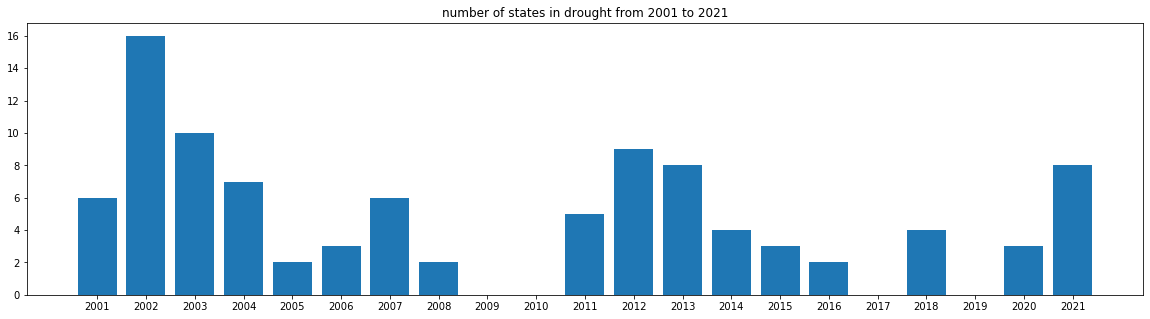

In [46]:
plt.figure(figsize = (20,5))
plt.bar(state_count['year'], state_count['dr_year_or_not'])
plt.xticks(state_count['year'])
plt.title("number of states in drought from 2001 to 2021")
plt.show()

In [51]:
df_region = df_summary.groupby(['region','year'],as_index=False).sum()


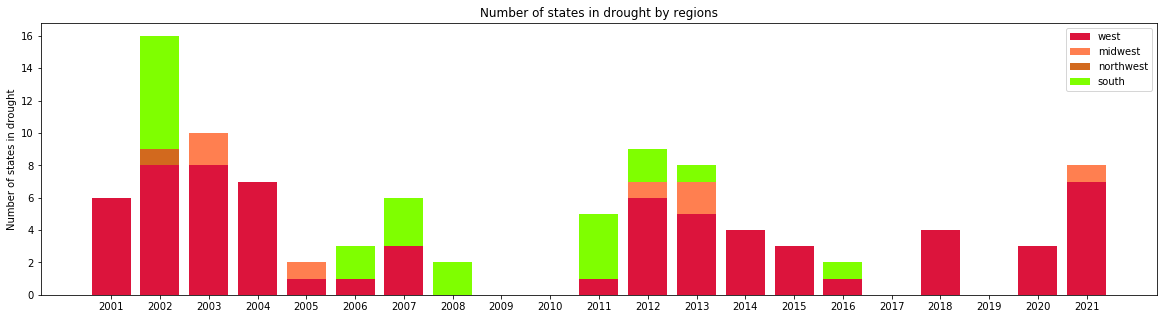

In [96]:
#note: we are omitting Puerto Rico on purpose here
labels =np.arange(2001,2022)
west = list(df_region[df_region['region'] == 'West']['dr_year_or_not'])
midwest = list(df_region[df_region['region'] == 'Midwest']['dr_year_or_not'])
northwest = list(df_region[df_region['region'] == 'Northwest']['dr_year_or_not'])
south = list(df_region[df_region['region'] == 'South']['dr_year_or_not'])

width = 0.8  


fig, ax = plt.subplots(figsize=(20, 5))

ax.bar(labels, west, width, label='west', color= '#DC143C')
ax.bar(labels, midwest, width, bottom=west, label='midwest', color='#FF7F50')
ax.bar(labels, northwest, width, bottom = np.array(west) + np.array(midwest), label='northwest', color='#D2691E')
ax.bar(labels, south, width, bottom = np.array(west) + np.array(midwest) + np.array(northwest), label='south', color='#7FFF00')

ax.set_xticks(np.arange(2001,2022))
ax.set_ylabel('Number of states in drought')
ax.set_title('Number of states in drought by regions')
ax.legend()

plt.show()

In [ ]:
df_summary.groupby(['region','year']).count()

In [41]:
#how drought_score is calculate
#group by state and year to compute mean of area_score and pop_score
#find the average of this 2 score and sum up toget total score then / 21 to get the average for this state in 21 yrs
df_score = df_summary.groupby(['state'], as_index=False).sum()
df_score['drought_score'] = (df_score['area_score'] + df_score['pop_score']) / 2 / 21
df_score = df_score[['state','drought_score']].sort_values(by=['drought_score'], ascending=False)
df_score

,state,drought_score
33,NV,31.267429
3,AZ,31.067209
32,NM,30.635010
4,CA,28.088912
45,UT,26.235489
51,WY,24.701672
5,CO,19.397996
13,ID,18.130294
44,TX,18.107733
26,MT,17.825791


In [99]:
#we want to color each bar by its region
col=[]
for i in df_score['state']:
    if i in region_dict['West']:
        col.append('#DC143C')
    if i in region_dict['Midwest']:
        col.append('#FF7F50')
    if i in region_dict['Northwest']:
        col.append('#D2691E')
    if i in region_dict['South']:
        col.append('#7FFF00')

['#DC143C',
 '#DC143C',
 '#DC143C',
 '#DC143C',
 '#DC143C',
 '#DC143C',
 '#DC143C',
 '#DC143C',
 '#7FFF00',
 '#DC143C',
 '#7FFF00',
 '#DC143C',
 '#7FFF00',
 '#FF7F50',
 '#7FFF00',
 '#FF7F50',
 '#FF7F50',
 '#7FFF00',
 '#7FFF00',
 '#FF7F50',
 '#7FFF00',
 '#FF7F50',
 '#7FFF00',
 '#7FFF00',
 '#DC143C',
 '#DC143C',
 '#7FFF00',
 '#FF7F50',
 '#D2691E',
 '#7FFF00',
 '#FF7F50',
 '#7FFF00',
 '#D2691E',
 '#D2691E',
 '#7FFF00',
 '#7FFF00',
 '#FF7F50',
 '#7FFF00',
 '#7FFF00',
 '#D2691E',
 '#FF7F50',
 '#D2691E',
 '#D2691E',
 '#FF7F50',
 '#D2691E',
 '#FF7F50',
 '#D2691E',
 '#7FFF00',
 '#FF7F50',
 '#D2691E',
 '#DC143C']

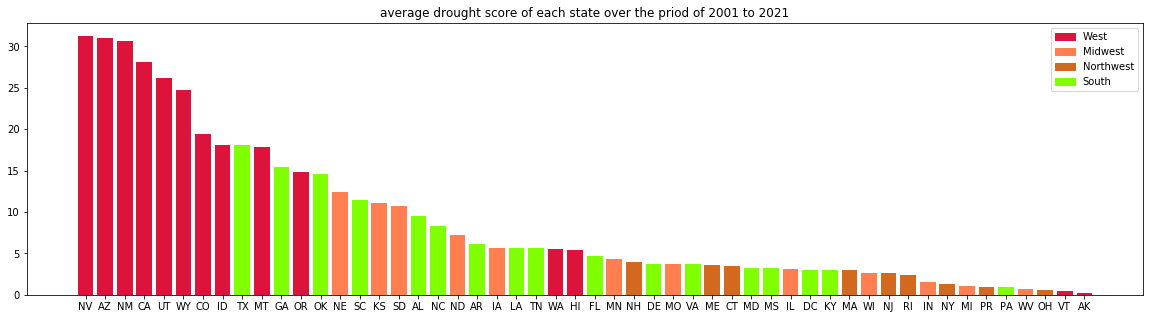

In [108]:
plt.figure(figsize = (20,5))
plt.bar(df_score['state'], df_score['drought_score'], color = col)
plt.title("average drought score of each state over the priod of 2001 to 2021")

#add legend
import matplotlib.patches as mpatches
west_patch = mpatches.Patch(color='#DC143C', label='West')
midwest_patch = mpatches.Patch(color='#FF7F50', label='Midwest')
northwest_patch = mpatches.Patch(color='#D2691E', label='Northwest')
south_patch = mpatches.Patch(color='#7FFF00', label='South')
plt.legend(handles=[west_patch, midwest_patch,northwest_patch,south_patch])

plt.show()

In [5]:
#we could view drought severity in real US map as well
conda install basemap

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - basemap -> python[version='>=3.5,<3.6.0a0|>=3.9,<3.10.0a0']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not

In [209]:
#need to map state_abb to actual state names, in order to plot in US map
#csv from: https://worldpopulationreview.com/states/state-abbreviations
state_name = pd.read_csv('US_state_abb.csv')
state_name = state_name[['State','Code']]
#state_name.shape #no Peurto Rico - need to manually add in one row 
state_name.loc[51] = ['Puerto Rico','PR']

In [207]:
score_dict = pd.merge(state_name, df_score, how='inner',left_on='Code',right_on='state')[['State','drought_score']].set_index('State').to_dict()
score_dict

{'drought_score': {'Alabama': 9.49719846453337,
  'Alaska': 0.22663977008316652,
  'Arizona': 31.067208778044353,
  'Arkansas': 6.160365657228864,
  'California': 28.088912447054295,
  'Colorado': 19.397995706749075,
  'Connecticut': 3.532418830296189,
  'Delaware': 3.770097948871534,
  'District of Columbia': 2.967860521728447,
  'Florida': 4.68921741692968,
  'Georgia': 15.438512835871327,
  'Hawaii': 5.405970789218768,
  'Idaho': 18.13029400637049,
  'Illinois': 3.167105806118609,
  'Indiana': 1.557905378164812,
  'Iowa': 5.689225676240501,
  'Kansas': 11.093071719011744,
  'Kentucky': 2.9528410740203195,
  'Louisiana': 5.672825177966687,
  'Maine': 3.6014244397162183,
  'Maryland': 3.217682814215833,
  'Massachusetts': 2.9391907411247034,
  'Michigan': 1.0692549520211245,
  'Minnesota': 4.353952580064439,
  'Mississippi': 3.197307297374683,
  'Missouri': 3.7233613338094464,
  'Montana': 17.825790766274253,
  'Nebraska': 12.445010737241196,
  'Nevada': 31.267429362528755,
  'New Ham

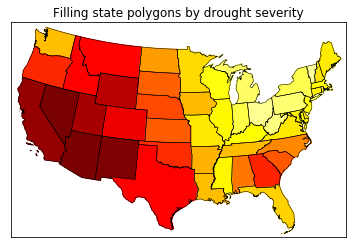

In [218]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)

# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 45 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    score = score_dict['drought_score'][statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
    colors[statename] = cmap(1.-np.sqrt((score-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.

ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    color = rgb2hex(colors[statenames[nshape]]) 
    poly = Polygon(seg,facecolor=color,edgecolor=color)
    ax.add_patch(poly)

plt.title('Filling state polygons by drought severity')
plt.show()

In [116]:
#now we want to report the sum of pop/area in different drought level 
#set up a new dataframe, keeping all drought level and actual number of area/pop 
dfn = source[['state_abb','valid_start','drought_lvl','area_total','pop_total']]
dfn_2021 = dfn[dfn['valid_start'].dt.year == 2021]
#group by date and drought level, sum
dfn_2021_sum = dfn_2021.groupby(['valid_start','drought_lvl'], as_index=False).sum()
dfn_2021_sum

,valid_start,drought_lvl,area_total,pop_total
0,2021-01-05,D0,528028.93,44679432.28
1,2021-01-05,D1,387906.00,27863522.84
2,2021-01-05,D2,354992.99,20308247.16
3,2021-01-05,D3,350097.87,14268074.61
4,2021-01-05,D4,284653.50,8454037.24
...,...,...,...,...
135,2021-07-13,D0,432298.49,26222563.34
136,2021-07-13,D1,285185.86,17663776.22
137,2021-07-13,D2,388735.53,14402271.32
138,2021-07-13,D3,429842.29,28689130.13


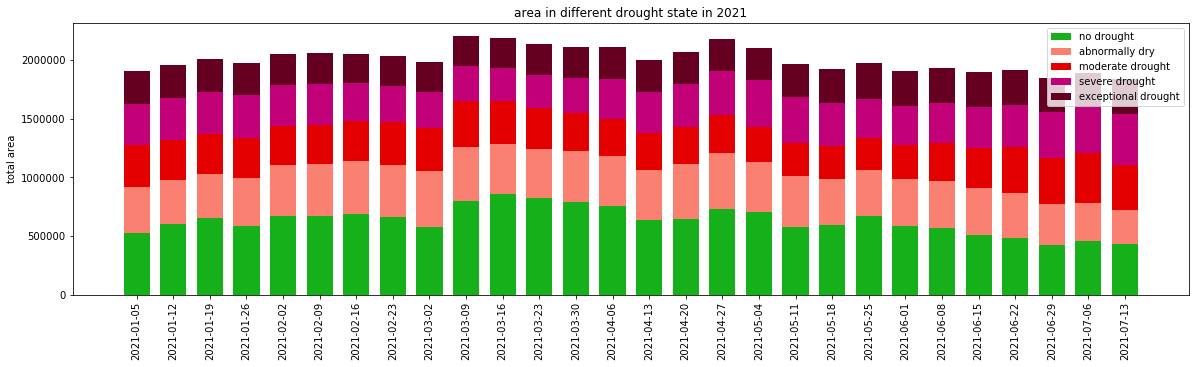

In [175]:
labels = dfn_2021_sum['valid_start'].dt.date.unique()  #plot datetime64 as x axis
N = dfn_2021_sum['valid_start'].nunique()
ind = labels

d0_area = list(dfn_2021_sum[dfn_2021_sum['drought_lvl'] == 'D0']['area_total'])
d1_area = list(dfn_2021_sum[dfn_2021_sum['drought_lvl'] == 'D1']['area_total'])
d2_area = list(dfn_2021_sum[dfn_2021_sum['drought_lvl'] == 'D2']['area_total'])
d3_area = list(dfn_2021_sum[dfn_2021_sum['drought_lvl'] == 'D3']['area_total'])
d4_area = list(dfn_2021_sum[dfn_2021_sum['drought_lvl'] == 'D4']['area_total'])

fig,ax = plt.subplots(figsize=(20,5))
width=5

ax.bar(ind, d0_area, width, label='no drought', color='#15B01A' )
ax.bar(ind, d1_area, width, bottom=d0_area, label='abnormally dry', color='#FA8072' )
ax.bar(ind, d2_area, width, bottom=np.array(d0_area)+np.array(d1_area), label='moderate drought', color='#E50000' )
ax.bar(ind, d3_area, width, bottom=np.array(d0_area)+np.array(d1_area)+np.array(d2_area), label='severe drought', color='#C20078' )
ax.bar(ind, d4_area, width, bottom=np.array(d0_area)+np.array(d1_area)+np.array(d2_area)+np.array(d3_area), label='exceptional drought', color='#650021' )

ax.set_xticks(labels)
ax.xaxis.set_tick_params(rotation=90)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('total area')
ax.set_title('area in different drought state in 2021')
ax.legend()

plt.show()


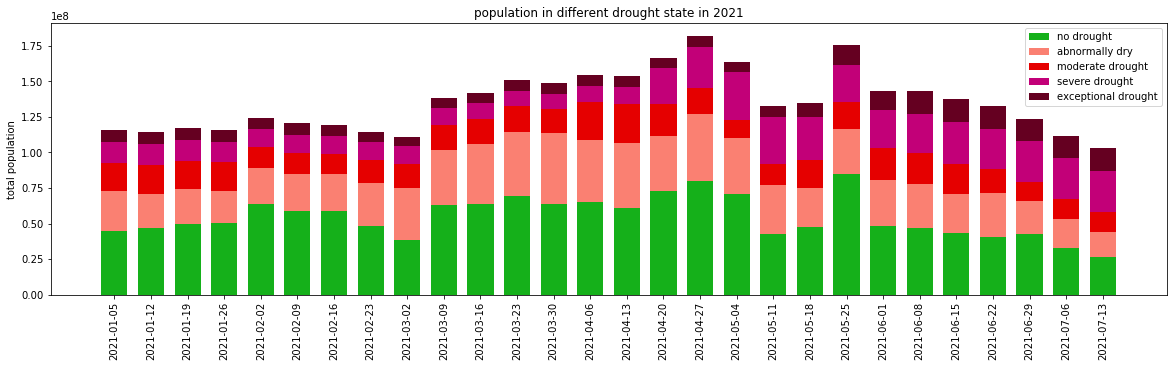

In [178]:
d0_pop = list(dfn_2021_sum[dfn_2021_sum['drought_lvl'] == 'D0']['pop_total'])
d1_pop = list(dfn_2021_sum[dfn_2021_sum['drought_lvl'] == 'D1']['pop_total'])
d2_pop = list(dfn_2021_sum[dfn_2021_sum['drought_lvl'] == 'D2']['pop_total'])
d3_pop = list(dfn_2021_sum[dfn_2021_sum['drought_lvl'] == 'D3']['pop_total'])
d4_pop = list(dfn_2021_sum[dfn_2021_sum['drought_lvl'] == 'D4']['pop_total'])

fig,ax = plt.subplots(figsize=(20,5))
width=5

ax.bar(ind, d0_pop, width, label='no drought', color='#15B01A' )
ax.bar(ind, d1_pop, width, bottom=d0_pop, label='abnormally dry', color='#FA8072' )
ax.bar(ind, d2_pop, width, bottom=np.array(d0_pop)+np.array(d1_pop), label='moderate drought', color='#E50000' )
ax.bar(ind, d3_pop, width, bottom=np.array(d0_pop)+np.array(d1_pop)+np.array(d2_pop), label='severe drought', color='#C20078' )
ax.bar(ind, d4_pop, width, bottom=np.array(d0_pop)+np.array(d1_pop)+np.array(d2_pop)+np.array(d3_pop), label='exceptional drought', color='#650021' )

ax.set_xticks(labels)
ax.xaxis.set_tick_params(rotation=90)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('total population')
ax.set_title('population in different drought state in 2021')
ax.legend()

plt.show()



Summary:

We define a state to be in drought condition throughout the year if more than half of the area or population is in drought (level D2-D4) and the duration last for more than half of year.

Under this definition, the most severe nationwide drought in the US happened in 2002, with 16 states in drought condition.

The number of states in drought decreased in this decade, compared to the last decade (2001 - 2011), however, in recent years, the number increases steadily.

In recent years (2018 - 2021), most of the drought occurred in the western area.

We have calculated the weighted average drought severity score for each state, 9 out of 10 top ranking frought states are in the west region.